In [1]:
import requests 
import pandas as pd 
import sklearn as sk 


In [2]:
play1_data1 = pd.ExcelFile(r'C:\Users\Michael G\Documents\Play1Data.xlsx')
play1_data = pd.read_excel(play1_data1, 'Range Bound Play 1 (V2)-FLAT')

list(play1_data)

['Ticker',
 'Date',
 'W/L',
 'Prior day close',
 'PM Open Price',
 'PM Hi',
 'PM LO',
 'PM Lo After PM Hi',
 'MKT Open Price',
 'Hi of Spike after open before drop',
 'Lowest lo from open to squeeze',
 'HOD AFTER PM HI',
 'Price at hi of squeeze',
 'Volume',
 'Volume ($M)',
 'MKT CAP(M)',
 'FLOAT(M)',
 'PM VOL',
 'Overhead supply above 20m (Y/N)',
 'Day 1 (Y/N)',
 'Time until lowest lo (mins) from open',
 'Time until ideal entry point (mins) from open',
 'Entry Price',
 'Duration of frontside (mins)',
 'Time of Entry',
 'Prior Close to PM Hi %',
 'Full day % Change',
 'Squeeze % from open',
 'Squeeze % above PM HI',
 'Squeeze %',
 'PM Float Rotations',
 'Float Rotations per day',
 'Spike % on open before drop',
 'Opening Price % Retracement of Prior Move',
 'Opening Price % Retracement of Prior Move (relative to day)',
 'Pullback % from open (relative to day) ',
 'Pullback from spike ',
 'Pullback % from open',
 'Retracement of Prior Move % until lowerst low (Not relative)',
 'Retracem

In [3]:
#don't really need this but its okay for now
#this cell won't be empty unless the rest of it is empty which is why i am using it filter out nan cells 

play1_data.dropna(subset = ['PM Hi'], inplace = True)

#we only want setups that worked/were wins so we will filter the original data by wins 

w_filter = play1_data['W/L'] == 'W'

play1_data = play1_data[w_filter]

display(play1_data)

,Ticker,Date,W/L,Prior day close,PM Open Price,PM Hi,PM LO,PM Lo After PM Hi,MKT Open Price,Hi of Spike after open before drop,...,Opening Price % Retracement of Prior Move,Opening Price % Retracement of Prior Move (relative to day),Pullback % from open (relative to day),Pullback from spike,Pullback % from open,Retracement of Prior Move % until lowerst low (Not relative),Retracement of prior move w/ if pm lo < prior day close,Retracement of prior move % until lowest lo (relative to day),Time until ideal entry + 390 (6:30),Time until top
0,LLIT,2020-02-13,W,6.20,6.20,7.70,6.08,6.88,6.96,6.96,...,0.096104,0.456790,0.090909,0.011494,0.011494,0.106494,0.506173,0.546667,391.0,423
1,YTEN,2020-04-27,W,5.15,5.69,8.00,5.53,6.28,7.21,7.55,...,0.098750,0.277193,0.451456,0.176144,0.128988,0.603509,0.603509,0.593750,395.0,07:24:00
2,CLSK,2020-04-09,W,1.11,1.25,3.61,1.25,3.39,3.50,4.15,...,0.030471,0.044000,0.188285,0.314286,0.128571,0.361842,0.361842,0.357377,404.0,06:56:00
3,NNVC,2020-05-12,W,7.25,7.25,10.25,7.29,9.11,9.65,9.90,...,0.058537,0.200000,0.250000,0.062176,0.062176,0.117073,0.400000,0.400000,395.0,403
4,KPTI,2020-03-02,W,16.30,16.30,24.73,16.99,22.25,23.52,23.52,...,0.048928,0.143535,0.210526,0.064626,0.064626,0.110392,0.323843,0.323843,392.0,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,LIZI,2020-12-03,W,2.42,2.40,5.20,2.40,4.12,4.39,4.78,...,0.155769,0.289286,0.281407,0.127563,0.127563,0.263462,0.489286,0.492806,404.0,06:44:00
78,SPI,2020-09-23,W,1.07,1.09,4.03,1.09,2.88,3.54,4.23,...,0.121588,0.165541,0.097166,0.262712,0.067797,0.219858,0.294304,0.294304,417.0,11:05:00
79,ECOR,2020-07-13,W,1.55,1.36,3.38,1.36,2.98,3.14,3.25,...,0.071006,0.118812,0.207865,0.152866,0.117834,0.180473,0.301980,0.333333,399.0,06:50:00
80,AIKI,2021-01-06,W,0.87,0.87,1.60,0.84,1.35,1.45,1.45,...,0.093750,0.197368,0.213115,0.089655,0.089655,NaN,0.368421,NaN,392.0,06:46:00


In [4]:
attributes_list = ['Ticker','Date','Prior Close to PM Hi %','FLOAT(M)','PM VOL']
#creating new df w/ the attributes that i want to test with k-means
attributes_df = play1_data[attributes_list]

attributes_df = attributes_df.dropna(axis = 0)



attributes_df.set_index(['Ticker', 'Date'], inplace = True)


attributes_df = attributes_df.astype('float')

display(attributes_df)

,,Prior Close to PM Hi %,FLOAT(M),PM VOL
Ticker,Date,,,
LLIT,2020-02-13,0.241935,3.00,113820.0
YTEN,2020-04-27,0.553398,1.92,446041.0
CLSK,2020-04-09,2.252252,3.38,782201.0
KPTI,2020-03-02,0.517178,53.39,968555.0
PRVB,2019-06-10,1.345455,24.62,1153010.0
...,...,...,...,...
PPSI,2020-10-06,1.134969,3.20,19478885.0
LIZI,2020-12-03,1.148760,22.74,23403663.0
SPI,2020-09-23,2.766355,7.20,23432797.0


In [5]:
#define filters for outliers if NEEDED

gap_filter = attributes_df['Prior Close to PM Hi %'] < 2.5
float_filter = attributes_df['FLOAT(M)'] < 50
PM_Vol_filter = attributes_df['PM VOL'] < 20000000

gap_filter_count = pd.Series(gap_filter).value_counts()
float_filter_count =  pd.Series(float_filter).value_counts()
PM_Vol_filter_count =  pd.Series(PM_Vol_filter).value_counts()
#checking to see how much my filter is going to effect my data ~ also can help me see if there are outliers
display(gap_filter_count)
display(float_filter_count)
display(PM_Vol_filter_count)

#apply filters to below if needed
filtered_df = attributes_df


True     67
False     6
Name: Prior Close to PM Hi %, dtype: int64

True     62
False    11
Name: FLOAT(M), dtype: int64

True     69
False     4
Name: PM VOL, dtype: int64

In [6]:
#checking data 

df_summ = attributes_df.describe()
df_summ

,Prior Close to PM Hi %,FLOAT(M),PM VOL
count,73.000000,73.000000,7.300000e+01
mean,1.077539,24.258356,7.319841e+06
std,0.827086,34.703970,7.203279e+06
min,0.128451,1.090000,1.138200e+05
25%,0.517178,4.010000,2.763635e+06
50%,0.888889,8.130000,5.021483e+06
75%,1.248101,26.110000,9.079049e+06
max,3.954545,154.430000,4.383689e+07


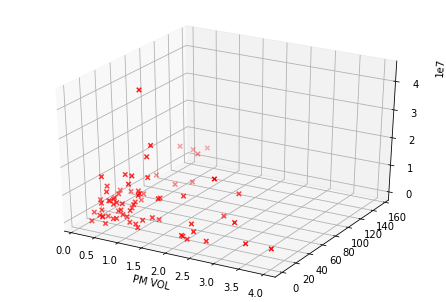

In [7]:
#doing this just for when I use 3-attributes ~ obviously wont plot if I decide to use more than 3

%matplotlib inline 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

figure = plt.figure()
ax = Axes3D(figure)

x = list(attributes_df.iloc[:,0])
y = list(attributes_df.iloc[:,1])
z = list(attributes_df.iloc[:,2])

col_names = attributes_df.columns
ax.set_xlabel(col_names[0])
ax.set_xlabel(col_names[1])
ax.set_xlabel(col_names[2])

ax.scatter(x,y,z, c= 'red', marker = 'x')
plt.show()

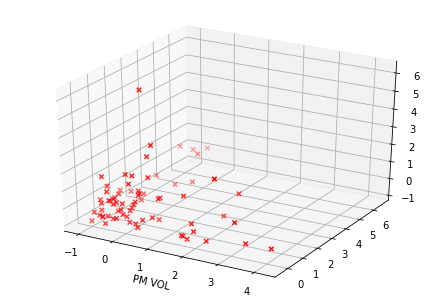

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

min_max_scaler = MinMaxScaler()
std_scaler = StandardScaler()
robust_scaler = RobustScaler()

X_train_minmax = min_max_scaler.fit_transform(attributes_df)
X_train_standard = std_scaler.fit_transform(attributes_df)
X_train_robust = robust_scaler.fit_transform(attributes_df)

figure = plt.figure()
ax = Axes3D(figure)

x = list(X_train_robust [:,0])
y = list(X_train_robust [:,1])
z = list(X_train_robust [:,2])

col_names = attributes_df.columns
ax.set_xlabel(col_names[0])
ax.set_xlabel(col_names[1])
ax.set_xlabel(col_names[2])

ax.scatter(x,y,z, c= 'red', marker = 'x')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

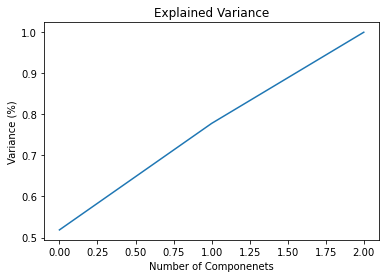

In [9]:
#Principal component analysis

from sklearn.decomposition import PCA 
import numpy as np
pca = PCA().fit(X_train_robust)

plt.figure()

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of Componenets')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')

plt.show


In [10]:
#modify dataset in accordance to PCA

pca_dataset = PCA(n_components = 2).fit(X_train_robust).transform(X_train_robust)

pca_dataset = pd.DataFrame(data = pca_dataset, columns = ['component 1', 'component 2'])

pca_dataset.head()

,component 1,component 2
0,-0.513264,-1.439470
1,-0.696809,-1.306350
2,-1.375793,-0.774899
3,1.523160,-1.004867
4,-0.071949,-0.874892


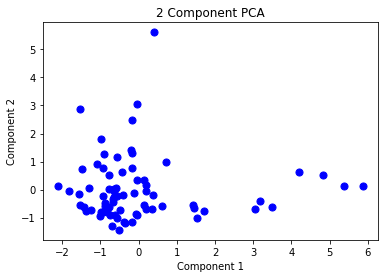

In [11]:
plt.figure()

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
           
plt.scatter(pca_dataset['component 1'], pca_dataset['component 2'], c = 'blue', s = 50)           

In [12]:
#PCA was definitely not necessary with only 3 columns, if i start to add more columns it will be helpful 

In [13]:
from sklearn.cluster import KMeans
from sklearn import metrics
#dict for storing scores
results_dict = {}

num_of_clusters = 10 

for k in range(2, num_of_clusters):
    print('-'*100)
    
    results_dict[k] = {}
    
    kmeans = KMeans(n_clusters = k, random_state=0).fit(X_train_robust)
    
    sil_score = metrics.silhouette_score(X_train_robust, kmeans.labels_, metric = 'euclidean')
                    
    results_dict[k]['silhouette_score'] = sil_score
    results_dict[k]['inertia'] = kmeans.inertia_
    results_dict[k]['score'] = kmeans.score
    results_dict[k]['model'] = kmeans
                    
    print("The number of clusters: {}".format(k))
    print("Silhouette Score: {}".format(sil_score))

----------------------------------------------------------------------------------------------------
The number of clusters: 2
Silhouette Score: 0.5749871035579026
----------------------------------------------------------------------------------------------------
The number of clusters: 3
Silhouette Score: 0.44222224348100264
----------------------------------------------------------------------------------------------------
The number of clusters: 4
Silhouette Score: 0.4658650502779785
----------------------------------------------------------------------------------------------------
The number of clusters: 5
Silhouette Score: 0.3469267331314389
----------------------------------------------------------------------------------------------------
The number of clusters: 6
Silhouette Score: 0.36701596325976826
----------------------------------------------------------------------------------------------------
The number of clusters: 7
Silhouette Score: 0.3477968191565729
--------------

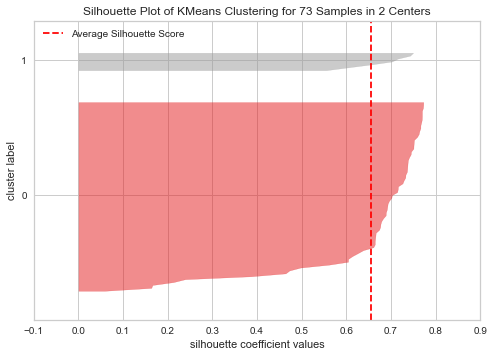

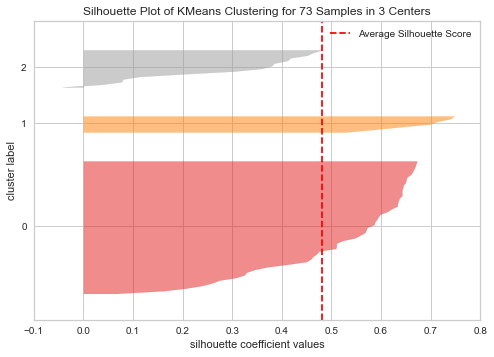

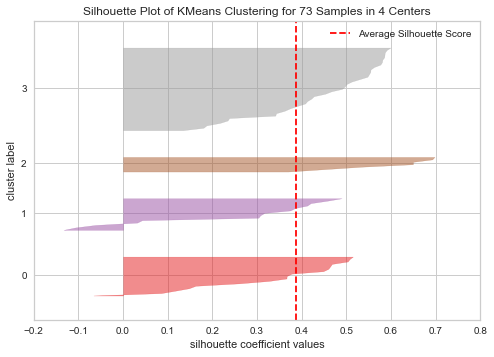

In [14]:
from yellowbrick.cluster import SilhouetteVisualizer

clusters = [2, 3, 4]

for cluster in clusters: 
        kmeans = KMeans(n_clusters = cluster, random_state=0)
        
        visualizer = SilhouetteVisualizer(kmeans)
        
        visualizer.fit(pca_dataset)
        
        visualizer.poof()

In [15]:
#seems to be one that dominates the rest of them, more data may help even this out

----------------------------------------------------------------------------------------------------


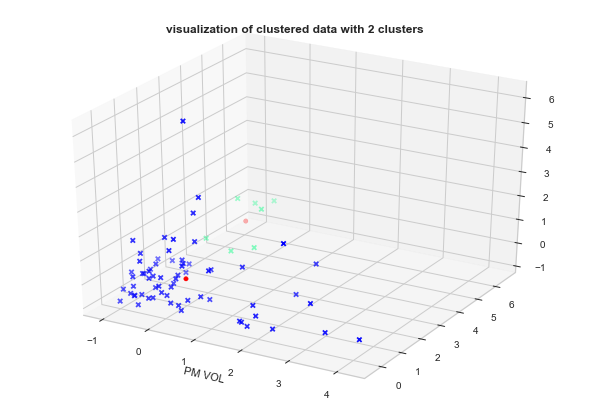

----------------------------------------------------------------------------------------------------


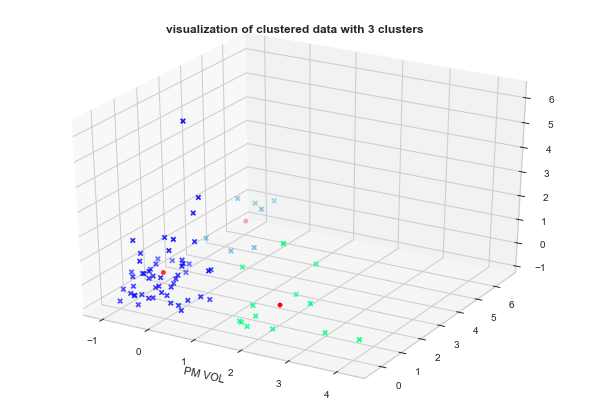

----------------------------------------------------------------------------------------------------


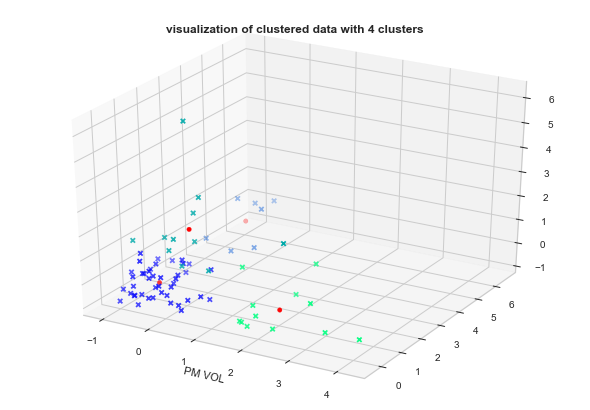

In [16]:
clusters = [2,3,4]
for cluster in clusters:
    
    print('-'*100)
    kmeans = KMeans(n_clusters= cluster, random_state=0).fit(X_train_robust)
    
    cluster_center = kmeans.cluster_centers_
    c1 = cluster_center[:,0]
    c2 = cluster_center[:,1]
    c3 = cluster_center[:,2]
    
   
    figure = plt.figure()
    ax = Axes3D(figure)

    x = list(X_train_robust [:,0])
    y = list(X_train_robust [:,1])
    z = list(X_train_robust [:,2])

    col_names = attributes_df.columns
    ax.set_xlabel(col_names[0])
    ax.set_xlabel(col_names[1])
    ax.set_xlabel(col_names[2])

    ax.scatter(x,y,z, c= kmeans.labels_.astype(float), cmap = 'winter', marker = 'x')
    ax.scatter(c1,c2,c3, marker = 'o', color = 'red')
    
    plt.title('visualization of clustered data with {} clusters'.format(cluster),fontweight = 'bold')
    plt.show()